# Resultados Trabalho 2

Dataset utilizado: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance




In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [14]:
# Carregar os dados
dados = pd.read_csv('study_performance.csv')

# Visualizar as primeiras linhas do dataframe
dados.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sat, 29 Jun 2024   Prob (F-statistic):          2.25e-243
Time:                        14:38:04   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.5241      1.328      5.665

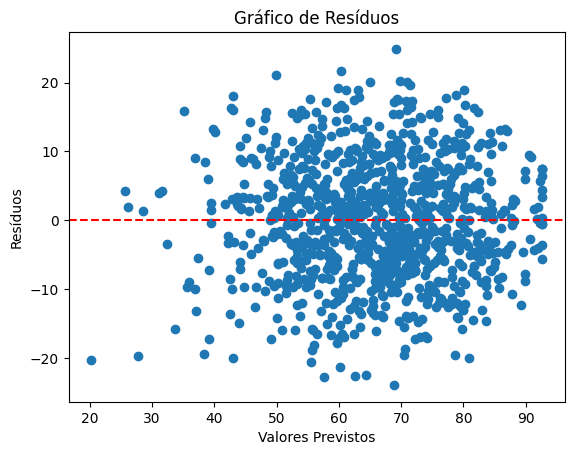

In [15]:


# Definir a variável dependente e independente
X = dados[['reading_score', 'writing_score']]  # variáveis independentes
y = dados['math_score']  # variável dependente

# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Passo 3: Criar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Passo 4: Imprimir o resumo do modelo
print(modelo.summary())

# Passo 5: Plotar os resíduos para verificar a homogeneidade da variância
plt.scatter(modelo.predict(), modelo.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

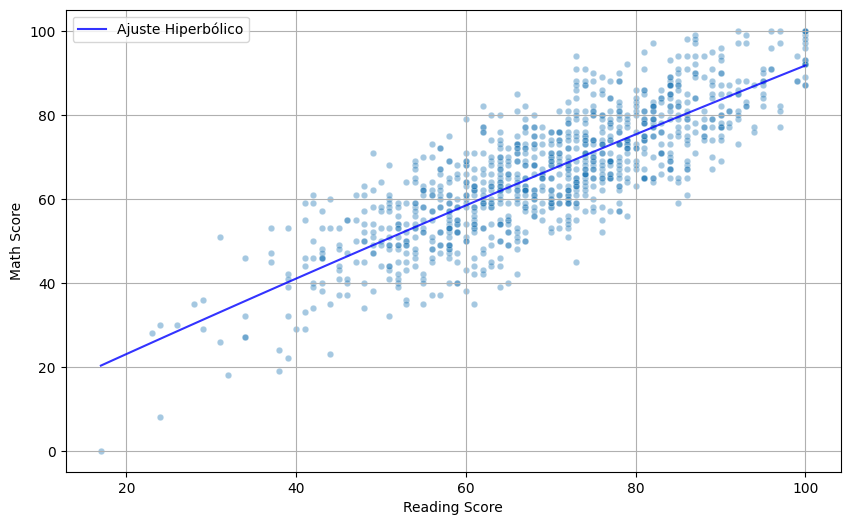

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Função hiperbólica
def hyperbolic(x, a, b, c):
    return a / (x + b) + c

# Cria o gráfico de dispersão dos valores de reading_score em relação a math_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='reading_score', y='math_score', alpha=0.4, s=22)

# Ajuste hiperbólico
x = dados['reading_score']
y = dados['math_score']
params, _ = curve_fit(hyperbolic, x, y, maxfev=10000)  # pode ser necessário ajustar os parâmetros iniciais ou aumentar maxfev se a convergência não for alcançada
a, b, c = params

# Gera valores para plotar a curva hiperbólica
x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = hyperbolic(x_vals, a, b, c)

# Plota a curva ajustada
plt.plot(x_vals, y_vals, color='blue', alpha=0.8, label='Ajuste Hiperbólico')

plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.legend()
plt.grid(True)
plt.show()
